#Group Name: Ufscarros#

Participants:
Eduardo Marsola do Nascimento; edunasci1975@gmail.com; 183.578.058-09 \
Nicolas Cenedesi Silveira; nicolas.cenedesi@gmail.com; 503.559.518-86 \
Pedro Marques Pontes; pmarquespontes@gmail.com; 449.094.218-40 \
Luís Eduardo Santos de Vasconcelos Penante;Dudusvpenanteluis@gmail.com; 107.035.224-18 \
Ivan Augusto Vicentin; ivanav.dp@gmail.com; 469.379.078-85 \
 \


##Exercise 1:##


## Code exercise 1:##

In [ ]:
# First install the packages
!pip install pyscf                 # for method='pyscf`
!pip install openfermionpyscf      # for method='openfermion`
!pip install pennylane

In [ ]:
import pennylane as qml
from pennylane import numpy as pnp

In [ ]:
n = int(input('selecione o número de qubits que deseja'))
num_wires = n
Xs=0
Zs=0
for i in range (n):
  for j in range (i+1,n):
    Xs += 1/3*((qml.PauliX(wires=i))@(qml.PauliX(wires=j)))

  Zs += qml.PauliZ(wires=i)

hamiltoniano = Xs - Zs
print(hamiltoniano)


selecione o número de qubits que deseja3
0.3333333333333333 * (X(0) @ X(1)) + 0.3333333333333333 * (X(0) @ X(2)) + 0.3333333333333333 * (X(1) @ X(2)) + -1 * (Z(0) + Z(1) + Z(2))


Valor da expectativa do Hamiltoniano (média da soma das médições de todas as portas): 0.9999999999999991


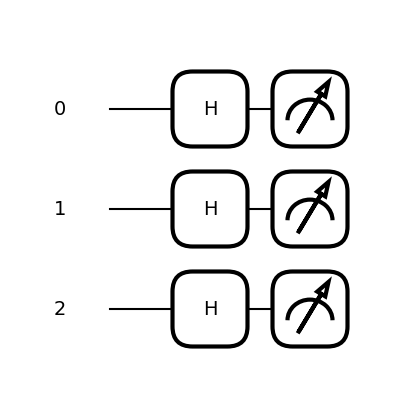

In [ ]:
#define device
dev = qml.device("default.qubit", wires=num_wires) # Quando você cria o dispositivo com qml.device(), você especifica em qual backend/qubit o circuito será executado.
@qml.qnode(dev)
def circuit():
  # Initial state
  # qml.BasisState([0,0,0], wires = [0,1,2]) # aqui, estamos definindo todas os 3 qubits definidos (n=3), no estado |0>
  for i in range(num_wires):
    qml.Hadamard(wires = i)
  # Return a measurement - aqui, devemos obter o hamiltoniano como retorno
  return qml.expval(hamiltoniano)
#estamos falando sobre o valor esprado do hamiltoniano pois devemos realizar as medidas dos qubits (onde dependendo dos gates operator, podemos possuir diversos possivis valor após a medição do qubit)
qml.draw_mpl(circuit, decimals = 2)();

# print(H3data.hf_state) essa função printa os estados de cada um dos qubits a partir dos dados contidos em H3data
# print(H3data.hamiltonian) -  o que todos esses números representam
result = circuit()
print(f"Valor da expectativa do Hamiltoniano (média da soma das médições de todas as portas): {result}")
